# One class SVM

One class SVM tries to find a function $f(x)$ which returns $+1$ in a "small" region capturing most of the data and $-1$ elsewhere.    
This is particularly useful to detect outliers, since all new and train datapoints lying outside the small region are potential outliers.   

We solve   

$min_{\omega,\zeta,\rho} \frac{\displaystyle 1}{\displaystyle 2}||w||^2 + \frac{\displaystyle 1}{\displaystyle \nu \ell} \sum_i \zeta_i -\rho $    

The small region is a hyperplane characterized by $\omega$ and $\rho$, and we add slack variables $\zeta_i$ which are datapoints outside the hyperplane (outliers).   

The solution is characterized by the choice of $\nu$.    
* If $\nu \rightarrow 0 $ the right part of the equation becomes infinite, and we the algorithm may converge for $\rho$ taking a very large negative number, but if we constraint $\rho > 0$, the algorithm diverges.    
* If $\nu$ is small, then we penalize the right part of the equation (slack variables), not allowing for data points to live outside the hyperplane. In other words, the hyperplane region gets larger to contain most datapoints (or all) our training set.   
* If $\nu$ is large, the we allow some points of our training set to live outside the hyperplane, and the hyperplane size can be reduced.    
In general, there is not a systematic method to choosing $\nu$ and its value is entered as a parameter, this depends on the domain/case.

At the end, if we find a $\rho$ and $\omega$ that solve the problem, our decision function is:    
$f(x) = sgn ( \omega \cdot \theta(x)) - \rho )$   
which $=+1$ for positive samples and $-1$ for outliers.    

As in other SVM methods, we use Lagrange multipliers characterized by $\alpha_i$, such that, our support vectors   
$\omega = \sum_i \alpha_i \theta(x_i)$    
for $x_i$ positive elements in the training set, and hence the name of support vector machine.   

$\rho=\omega \cdot \theta(x_i) = \sum_j \alpha_j K(x_j,x_i) $,
where we can use a Kernel $K(x_j,x_i)$ of our choice.    

Kernels are used to map our linear boundaries to other functions, so that the hyperplane can take more complex shapes. Common choices of kernel functions are linear, polinomial and Gaussian functions.   

Let's take the Iris dataset as an example, inspired by the scikit-learn documentation.   

In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from collections import Counter
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
%matplotlib inline
rcParams['figure.figsize']=7,4
sb.set_style('whitegrid')

In [3]:
from sklearn import datasets
# import some data to play with

iris= datasets.load_iris()

X = iris.data[:, [1,2]]  # only take two features
y = iris.target

#columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']
columns=['Sepal Width','Petal Length']
df = pd.DataFrame(data=X,columns=columns)
df.head()


,Sepal Width,Petal Length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [4]:
# Train a One Class SVM model
model = OneClassSVM(kernel='rbf',degree=3,nu=0.1).fit(X)

# Print our model parameters
model

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [5]:
predictions = model.predict(X)
outliers_df = pd.DataFrame(df)

# Print counts of normal (+1 samples) and outliers (-1 samples)
print(Counter(predictions))
outliers_df[predictions==-1].head(4)

Counter({1.0: 136, -1.0: 14})


,Sepal Width,Petal Length
13,3.0,1.1
15,4.4,1.5
33,4.2,1.4
41,2.3,1.3


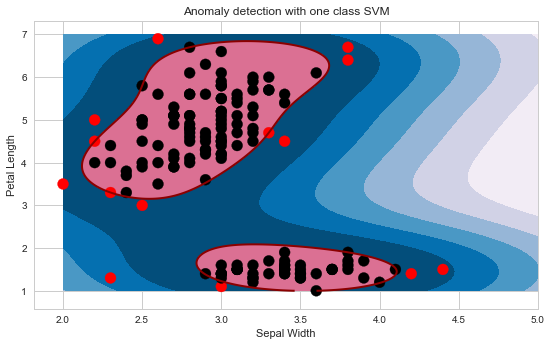

In [6]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

# This is to map colors to red and black points for -1 and +1 data points:   
colors = predictions
def labels_to_colors(x):
    if x == -1:
        return 'red'
    elif x == 1:
        return 'black'

colors = list(colors)
colors = list(map(lambda x: labels_to_colors(x), colors))

# Take x and y data to plot
x = X[:,0]
y = X[:,1]

# plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(2, 5, 500), np.linspace(1, 7, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# Plot data points 
ax.scatter(x,y,c=colors,s=120,marker='o')

# Set title and labels
ax.set_title('Anomaly detection with one class SVM')
ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])

plt.show()

In this example, the hyperplane is shown in red.    
Points inside the hyperplane (in black dots) are normal samples, and points outside the hyperplane (in red dots) are outliers.   